In [2]:
import warnings
warnings.filterwarnings('ignore')
## for data
import numpy as np
import pandas as pd
import math

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## for statistical tests
import scipy

# Pretty display for notebooks
%matplotlib inline

In [3]:
# Load the  housing dataset
data = pd.read_csv('/content/housing-full.csv')
print ('Housing dataset has {0} data points with {1} variables each'.format(*data.shape))
data.head()

Housing dataset has 506 data points with 14 variables each


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2


**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV (target)     Median value of owner-occupied homes in $1000's

In [4]:
prices = data['medv']
features = data.drop('medv', axis = 1)

X= features.values
y = prices.values

### Data Exploration

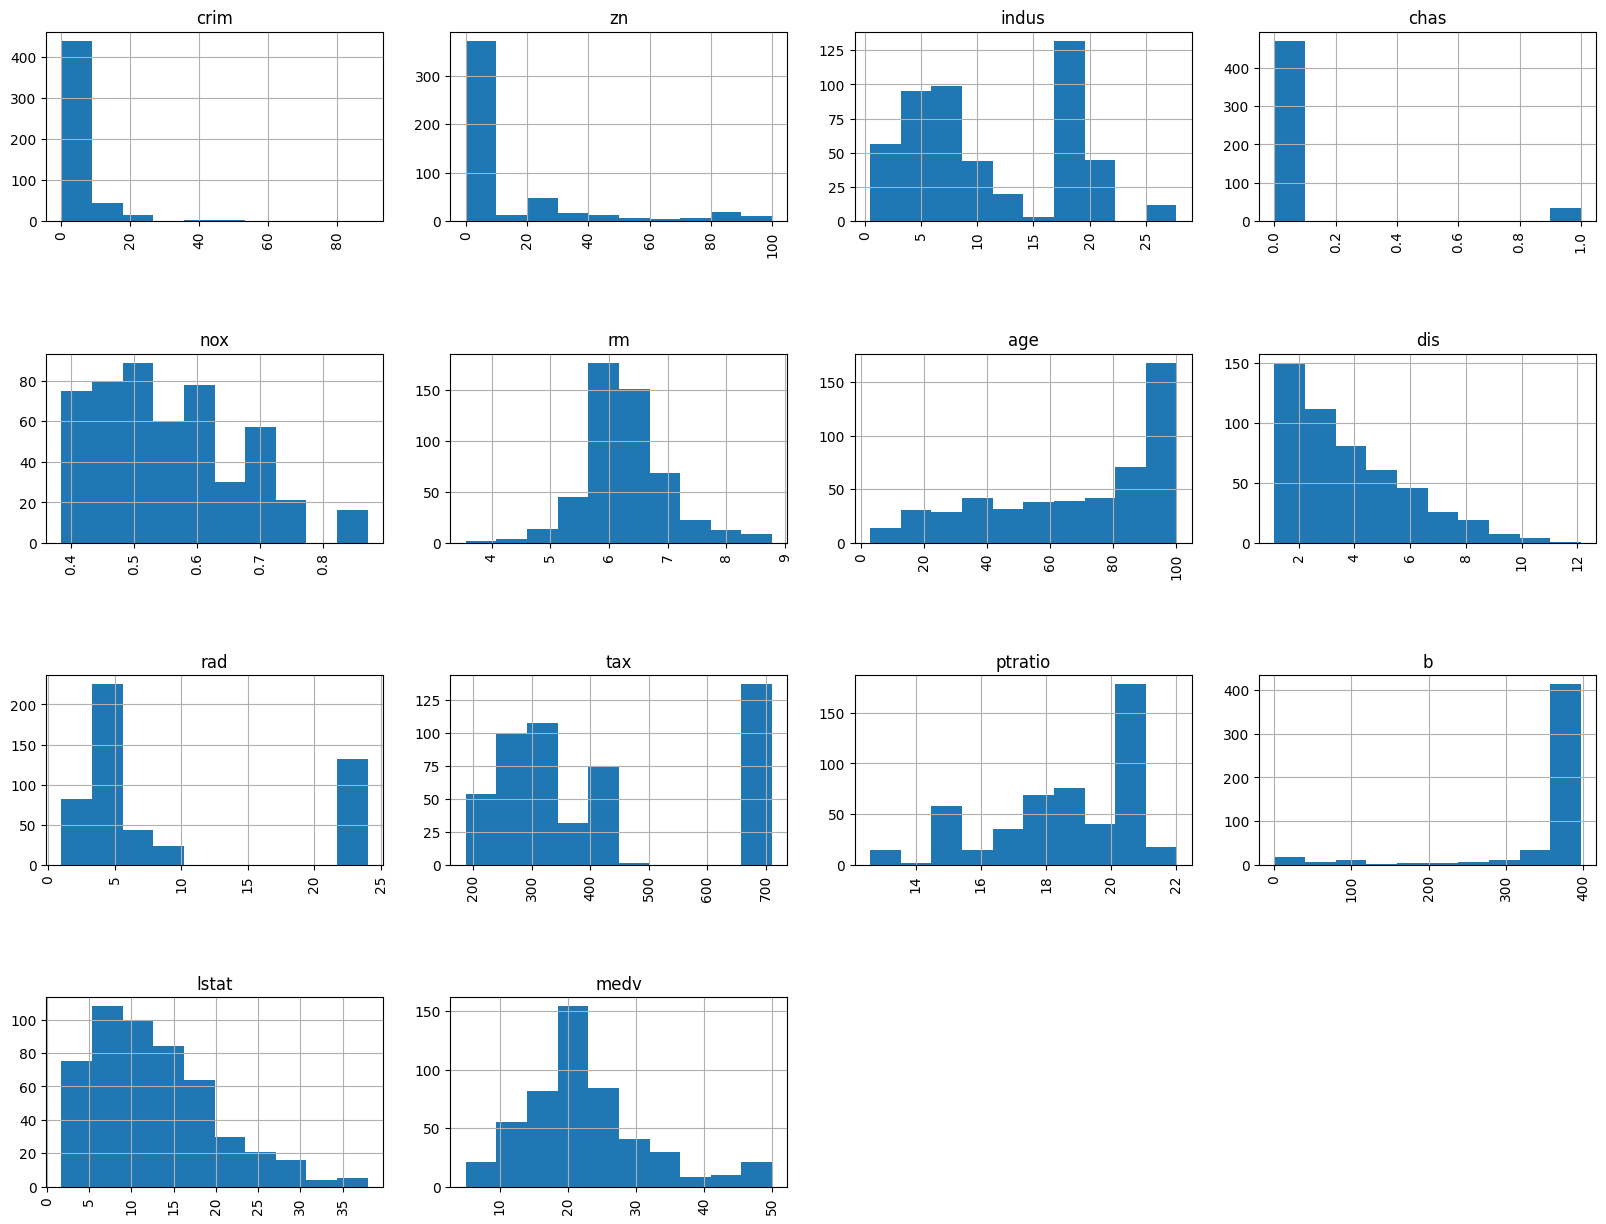

In [5]:
import matplotlib.pyplot as plt
import math

fig = plt.figure(figsize=(20, 15))
cols = 4
rows = math.ceil(float(data.shape[1]) / cols)

for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)

    if data.dtypes[column] == object:
        data[column].value_counts().plot(kind="bar", ax=ax)
    else:
        data[column].hist(ax=ax)
        plt.xticks(rotation="vertical")

plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

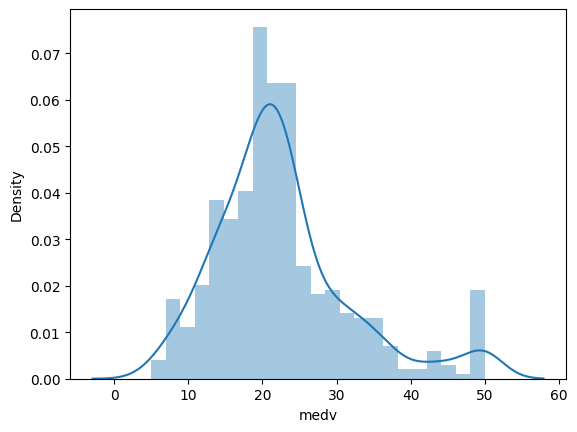

In [6]:
#distribution for the target
sns.distplot(prices);

ÿßŸÑÿ™Ÿàÿ≤Ÿäÿπ ŸÅŸä ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ£ÿÆŸäÿ±ÿå ÿßŸÑÿ∞Ÿä ŸäŸÖÿ´ŸÑ ÿ≥ÿπÿ± ÿßŸÑŸÖŸÜÿ≤ŸÑ (medv)ÿå ŸäŸÖŸäŸÑ ÿ•ŸÑŸâ ÿ£ŸÜ ŸäŸÉŸàŸÜ ÿ™Ÿàÿ≤ŸäÿπŸãÿß ÿ∑ÿ®ŸäÿπŸäŸãÿß ÿ•ŸÑŸâ ÿ≠ÿØ ŸÖÿßÿå ŸàŸÑŸÉŸÜŸá ŸÖŸÜÿ≠ÿ±ŸÅ ŸÇŸÑŸäŸÑÿßŸã ÿ•ŸÑŸâ ÿßŸÑŸäŸÖŸäŸÜ. Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ŸÖÿπÿ∏ŸÖ ŸÇŸäŸÖ ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿ™ÿ™ÿ±ŸÉÿ≤ ÿ≠ŸàŸÑ ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ÿå ŸàŸÑŸÉŸÜ ŸáŸÜÿßŸÉ ÿ®ÿπÿ∂ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÖÿ±ÿ™ŸÅÿπÿ© ŸÜÿ≥ÿ®ŸäŸãÿß ÿßŸÑÿ™Ÿä ÿ™ŸÖÿ™ÿØ ŸÜÿ≠Ÿà ÿßŸÑŸäŸÖŸäŸÜ.

Data Visualization

**Question** fit your data using `PCA` with `n_components=2`, transform `X` to 2 dimentional array (`principalComponents` )

In [7]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X) # Note: PCA does not require y for fitting
X_2D = model.transform(X) #Transform the data to 2D


#Convert to a DataFrame
principalDf = pd.DataFrame(X_2D, columns=['principal component 1', 'principal component 2'])

#Concatenate with target variable (prices)
finalDf = pd.concat([principalDf, prices.reset_index(drop=True)], axis=1)

finalDf.rename(columns={'medv': 'target'}, inplace=True)  # Rename for clarity
#Show explained variance ratio
print("Explained variance ratio:", model.explained_variance_ratio_)

Explained variance ratio: [0.80582318 0.16305197]


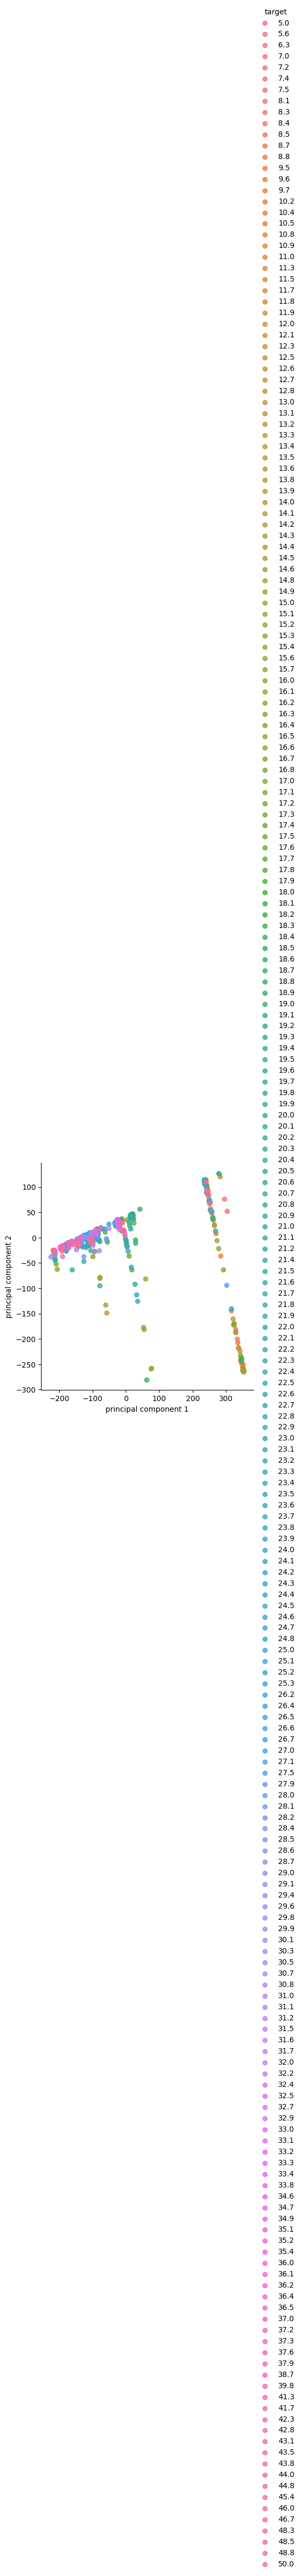

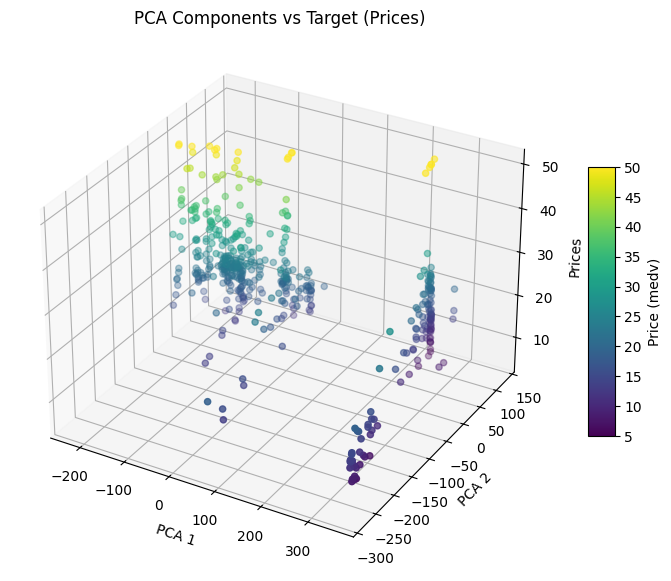

In [8]:
# Scatter plot with hue
sns.lmplot(
    x="principal component 1",
    y="principal component 2",
    hue='target',
    data=finalDf,
    fit_reg=False
)

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # type: Axes3D

x_ax = finalDf['principal component 1']
y_ax = finalDf['principal component 2']
z_ax = prices.values.astype(float)

# Scatter plot with color based on price
scatter = ax.scatter(x_ax, y_ax, z_ax, c=z_ax, cmap='viridis', marker='o')  # type: ignore

# Labels
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Prices')  # Now safe with Axes3D import

# Optional: Add a color bar
cbar = fig.colorbar(scatter, shrink=0.5, aspect=10)
cbar.set_label('Price (medv)')

plt.title("PCA Components vs Target (Prices)")
plt.show()

ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ£ÿÆŸäÿ± ŸáŸà ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÖÿ®ÿπÿ´ÿ± (scatter plot) ÿ´ŸÑÿßÿ´Ÿä ÿßŸÑÿ£ÿ®ÿπÿßÿØ (3D) ŸäŸàÿ∂ÿ≠ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿ®ŸäŸÜ ŸÖŸÉŸàŸÜÿßÿ™ PCA ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿäÿ© (Principal Components) Ÿàÿ≥ÿπÿ± ÿßŸÑŸÖŸÜÿ≤ŸÑ (Prices).

ŸÉŸäŸÅ ÿ™ŸÇÿ±ÿ£ ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä:

ÿßŸÑŸÖÿ≠ÿßŸàÿ±:

ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿ≥ŸäŸÜŸä (X-axis): ŸäŸÖÿ´ŸÑ ÿßŸÑŸÖŸÉŸàŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä ÿßŸÑÿ£ŸàŸÑ ŸÑŸÄ PCA ("PCA 1"). Ÿáÿ∞ÿß ÿßŸÑŸÖŸÉŸàŸÜ ŸäŸÖÿ´ŸÑ ÿ£ŸÉÿ®ÿ± ŸÇÿØÿ± ŸÖŸÜ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ©.
ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿµÿßÿØŸä (Y-axis): ŸäŸÖÿ´ŸÑ ÿßŸÑŸÖŸÉŸàŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä ÿßŸÑÿ´ÿßŸÜŸä ŸÑŸÄ PCA ("PCA 2"). Ÿáÿ∞ÿß ÿßŸÑŸÖŸÉŸàŸÜ ŸäŸÖÿ´ŸÑ ÿ´ÿßŸÜŸä ÿ£ŸÉÿ®ÿ± ŸÇÿØÿ± ŸÖŸÜ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ©ÿå ŸàŸäŸÉŸàŸÜ ŸÖÿ™ÿπÿßŸÖÿØŸãÿß (orthogonal) ŸÖÿπ ÿßŸÑŸÖŸÉŸàŸÜ ÿßŸÑÿ£ŸàŸÑ.
ÿßŸÑŸÖÿ≠Ÿàÿ± ÿßŸÑÿπŸäŸÜŸä (Z-axis): ŸäŸÖÿ´ŸÑ ÿ≥ÿπÿ± ÿßŸÑŸÖŸÜÿ≤ŸÑ (Prices)ÿå ŸàŸáŸä ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑÿ™Ÿä ŸÜÿ≠ÿßŸàŸÑ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®Ÿáÿß.
ÿßŸÑŸÜŸÇÿßÿ∑: ŸÉŸÑ ŸÜŸÇÿ∑ÿ© ŸÅŸä ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿ™ŸÖÿ´ŸÑ ŸÖŸÜÿ≤ŸÑŸãÿß Ÿàÿßÿ≠ÿØŸãÿß ŸÅŸä ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.

ÿßŸÑŸÑŸàŸÜ: ŸÑŸàŸÜ ŸÉŸÑ ŸÜŸÇÿ∑ÿ© ŸäŸÖÿ´ŸÑ ÿ≥ÿπÿ± ÿßŸÑŸÖŸÜÿ≤ŸÑ ÿßŸÑŸÖŸÇÿßÿ®ŸÑ ŸÑŸáÿß. Ÿäÿ™ÿ±ÿßŸàÿ≠ ÿßŸÑŸÑŸàŸÜ ŸÖŸÜ ÿßŸÑÿ£ÿ±ÿ¨ŸàÿßŸÜŸä ÿßŸÑÿØÿßŸÉŸÜ (ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿßŸÑŸÖŸÜÿÆŸÅÿ∂ÿ©) ÿ•ŸÑŸâ ÿßŸÑÿ£ÿµŸÅÿ± ÿßŸÑŸÅÿßÿ™ÿ≠ (ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ±ÿ™ŸÅÿπÿ©) ŸàŸÅŸÇŸãÿß ŸÑÿ¥ÿ±Ÿäÿ∑ ÿßŸÑÿ£ŸÑŸàÿßŸÜ ÿπŸÑŸâ ÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿ£ŸäŸÖŸÜ.

ÿ¥ÿ±ÿ≠ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨:

ÿßŸÑÿ™ÿ®ÿ≥Ÿäÿ∑: ÿßŸÑŸáÿØŸÅ ŸÖŸÜ PCA ŸáŸà ÿ™ŸÇŸÑŸäŸÑ ÿ£ÿ®ÿπÿßÿØ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÖÿπ ÿßŸÑÿ≠ŸÅÿßÿ∏ ÿπŸÑŸâ ÿ£ŸÉÿ®ÿ± ŸÇÿØÿ± ŸÖŸÖŸÉŸÜ ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ (ÿßŸÑÿ™ÿ®ÿßŸäŸÜ). ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸäÿå ÿ™ŸÖ ÿ™ÿ®ÿ≥Ÿäÿ∑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿ∞ÿßÿ™ ÿßŸÑŸÄ 13 ŸÖŸäÿ≤ÿ© ÿ•ŸÑŸâ ÿ®ÿπÿØŸäŸÜ ŸÅŸÇÿ∑ (PCA 1 Ÿà PCA 2) ÿ®ŸäŸÜŸÖÿß Ÿäÿ™ŸÖ ÿπÿ±ÿ∂Ÿáÿß ŸÖŸÇÿßÿ®ŸÑ ÿßŸÑÿ®ÿπÿØ ÿßŸÑÿ´ÿßŸÑÿ´ (ÿßŸÑÿ≥ÿπÿ±).

ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™: ŸäŸàÿ∂ÿ≠ ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ŸÉŸäŸÅ ÿ™ÿ™Ÿàÿ≤ÿπ ŸÜŸÇÿßÿ∑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÅÿ∂ÿßÿ° ÿ´ŸÑÿßÿ´Ÿä ÿßŸÑÿ£ÿ®ÿπÿßÿØ ÿßŸÑŸÖÿ®ÿ≥ÿ∑. ŸäŸÖŸÉŸÜŸÉ ŸÖŸÑÿßÿ≠ÿ∏ÿ© ŸÉŸäŸÅ ÿ™ÿ™ÿ¨ŸÖÿπ ÿßŸÑŸÜŸÇÿßÿ∑ ÿßŸÑÿ™Ÿä ŸÑŸáÿß ÿ£ÿ≥ÿπÿßÿ± ŸÖÿ™ÿ¥ÿßÿ®Ÿáÿ© ŸÖÿπŸãÿß.

ÿßŸÑÿπŸÑÿßŸÇÿ© ŸÖÿπ ÿßŸÑÿ≥ÿπÿ±: ŸÖŸÜ ÿÆŸÑÿßŸÑ ŸÅÿ≠ÿµ ŸÉŸäŸÅ Ÿäÿ™ÿ∫Ÿäÿ± ŸÑŸàŸÜ ÿßŸÑŸÜŸÇÿßÿ∑ (ÿßŸÑÿ£ÿ≥ÿπÿßÿ±) ŸÖÿπ ÿ™ÿ∫Ÿäÿ± ŸÇŸäŸÖ PCA 1 Ÿà PCA 2ÿå ŸäŸÖŸÉŸÜŸÉ ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ŸÅŸÉÿ±ÿ© ÿπŸÜ ŸÉŸäŸÅŸäÿ© ÿ™ÿ£ÿ´Ÿäÿ± ÿßŸÑŸÖŸÉŸàŸÜŸäŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ŸäŸäŸÜ ÿπŸÑŸâ ÿ≥ÿπÿ± ÿßŸÑŸÖŸÜÿ≤ŸÑ. ÿπŸÑŸâ ÿ≥ÿ®ŸäŸÑ ÿßŸÑŸÖÿ´ÿßŸÑ:

ÿ•ÿ∞ÿß ŸÑÿßÿ≠ÿ∏ÿ™ ÿ£ŸÜ ÿßŸÑŸÜŸÇÿßÿ∑ ÿ∞ÿßÿ™ ÿßŸÑŸÑŸàŸÜ ÿßŸÑÿ£ÿµŸÅÿ± ÿßŸÑŸÅÿßÿ™ÿ≠ (ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿßŸÑŸÖÿ±ÿ™ŸÅÿπÿ©) ÿ™ÿ™ÿ¨ŸÖÿπ ŸÅŸä ŸÖŸÜÿ∑ŸÇÿ© ŸÖÿπŸäŸÜÿ© ŸÖŸÜ ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿ®ŸäŸÜŸÖÿß ÿ™ÿ™ÿ¨ŸÖÿπ ÿßŸÑŸÜŸÇÿßÿ∑ ÿ∞ÿßÿ™ ÿßŸÑŸÑŸàŸÜ ÿßŸÑÿ£ÿ±ÿ¨ŸàÿßŸÜŸä ÿßŸÑÿØÿßŸÉŸÜ (ÿßŸÑÿ£ÿ≥ÿπÿßÿ± ÿßŸÑŸÖŸÜÿÆŸÅÿ∂ÿ©) ŸÅŸä ŸÖŸÜÿ∑ŸÇÿ© ÿ£ÿÆÿ±Ÿâÿå ŸÅŸáÿ∞ÿß Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑŸÖŸÉŸàŸÜŸäŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ŸäŸäŸÜ (ÿ£Ÿà ŸÖÿ≤Ÿäÿ¨ ŸÖŸÜŸáŸÖÿß) ŸÖÿ±ÿ™ÿ®ÿ∑ÿßŸÜ ÿ®ÿ≥ÿπÿ± ÿßŸÑŸÖŸÜÿ≤ŸÑ.
ŸÇÿØ ŸÑÿß ÿ™ŸÉŸàŸÜ ÿßŸÑÿπŸÑÿßŸÇÿ© ÿÆÿ∑Ÿäÿ© ÿ™ŸÖÿßŸÖŸãÿßÿå ŸàŸÑŸÉŸÜ PCA ÿ™ÿ≥ÿßÿπÿØ ŸÅŸä ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑÿßÿ™ÿ¨ÿßŸáÿßÿ™ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿäÿ© ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.
ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ÿßŸÑŸÖŸÅÿ≥ÿ±: ŸÅŸä ÿßŸÑŸÖÿÆÿ±ÿ¨ÿßÿ™ ÿßŸÑÿ≥ÿßÿ®ŸÇÿ©ÿå ÿ™ŸÖ ÿπÿ±ÿ∂ "Explained variance ratio". Ÿáÿ∞Ÿá ÿßŸÑŸÇŸäŸÖÿ© ÿ™Ÿàÿ∂ÿ≠ ÿßŸÑŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÖÿ¶ŸàŸäÿ© ŸÖŸÜ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ÿßŸÑŸÉŸÑŸä ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÖ ÿ™ŸÅÿ≥Ÿäÿ±Ÿáÿß ÿ®Ÿàÿßÿ≥ÿ∑ÿ© ŸÉŸÑ ŸÖŸÉŸàŸÜ ÿ±ÿ¶Ÿäÿ≥Ÿä. ŸÖÿ¨ŸÖŸàÿπ ŸÜÿ≥ÿ®ÿ© ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ÿßŸÑŸÖŸÅÿ≥ÿ± ŸÑŸÑŸÖŸÉŸàŸÜ ÿßŸÑÿ£ŸàŸÑ ŸàÿßŸÑÿ´ÿßŸÜŸä Ÿäÿπÿ∑ŸäŸÉ ŸÅŸÉÿ±ÿ© ÿπŸÜ ŸÖÿØŸâ ÿ¨ŸàÿØÿ© Ÿáÿ∞ŸäŸÜ ÿßŸÑŸÖŸÉŸàŸÜŸäŸÜ ŸÅŸä ÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿµŸÑŸäÿ©. ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ÿßŸÑŸÜÿ≥ÿ®ÿ© ÿßŸÑŸÖŸÅÿ≥ÿ±ÿ© ÿπÿßŸÑŸäÿ© (ŸÖÿ´ŸÑŸãÿß ÿ£ŸÉÿ´ÿ± ŸÖŸÜ 70-80%)ÿå ŸÅŸáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑŸÖŸÉŸàŸÜŸäŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ŸäŸäŸÜ ŸäŸÖÿ´ŸÑÿßŸÜ ÿ®ÿ¥ŸÉŸÑ ÿ¨ŸäÿØ ÿ¨ÿ≤ÿ°Ÿãÿß ŸÉÿ®Ÿäÿ±Ÿãÿß ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.

### Developing a Model

Define a Performance Metric

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `mean_squared_error` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`
- print the results.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and prints the performance score between
        true and predicted values based on two metrics:
        Mean Squared Error (MSE) and R¬≤ (R-squared). """

    # Calculate MSE and R¬≤ score
    mse = mean_squared_error(y_true, y_predict)
    r2 = r2_score(y_true, y_predict)

    # Print the results
    print(f"\tMean Squared Error (MSE): {mse:.4f}")
    print(f"\tR¬≤ Score: {r2:.4f}")

    # Optionally return the scores for further use
    return {"mse": mse, "r2": r2}

Implementation: Shuffle and Split Data
Your next implementation requires that you take the housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.model_selection to shuffle and split the features and prices data into training and testing sets.
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of 10. This ensures results are consistent.
Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [10]:
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
# Split into 80% train, 20% test; set random_state=10
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% for testing
    random_state=10      # Seed for reproducibility
)

# Success message
print("Training and testing split was successful.")
print("X_train:\n", X_train)
print("y_train:\n", y_train)

Training and testing split was successful.
X_train:
 [[8.87300e-02 2.10000e+01 5.64000e+00 ... 1.68000e+01 3.95560e+02
  1.34500e+01]
 [1.35222e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.31420e+02
  1.33300e+01]
 [1.61282e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 2.48310e+02
  2.03400e+01]
 ...
 [2.37857e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.70730e+02
  1.33400e+01]
 [1.69020e-01 0.00000e+00 2.56500e+01 ... 1.91000e+01 3.85020e+02
  1.48100e+01]
 [7.61620e-01 2.00000e+01 3.97000e+00 ... 1.30000e+01 3.92400e+02
  1.04500e+01]]
y_train:
 [19.7 23.1 13.5 21.2 23.1 13.6 22.8 18.2 13.1 23.2 22.8 25.1 18.9 10.9
 19.3 17.4 15.6 20.6 50.  32.7 21.8 13.4 16.6 23.6 11.  23.8 23.1 33.2
 28.2  8.5 32.4 29.6 17.1 24.2 26.4 33.2 10.5  8.8 28.  10.5 15.4 15.3
 10.4 15.7 43.1 24.7 21.  19.4 10.9 21.7 38.7 19.2 12.  17.5 23.9  9.7
 15.4 26.5 10.8 12.7 18.4 15.2 29.8 20.  23.8 14.6 19.8 10.2 23.7 18.7
 20.3 50.  25.  14.8  9.5 33.  19.4 15.6 20.2 21.7 24.7 19.5  7.2 31.7
 22.4 14.1 21.4 21.

ÿπŸÜÿØ ÿ™ŸÇÿ≥ŸäŸÖ ŸÖÿ¨ŸÖŸàÿπÿ© ÿ®ŸäÿßŸÜÿßÿ™ ÿµÿ∫Ÿäÿ±ÿ© ÿ•ŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ÿ™ÿØÿ±Ÿäÿ® Ÿà testing ÿå ŸÇÿØ ÿ™Ÿàÿßÿ¨Ÿá ÿπÿØÿ© ŸÖÿ¥ÿßŸÉŸÑ ÿ™ÿ§ÿ´ÿ± ÿπŸÑŸâ ŸÖŸàÿ´ŸàŸÇŸäÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿàÿ™ŸÇŸäŸäŸÖ ÿßŸÑÿ£ÿØÿßÿ° . ÿ•ŸÑŸäŸÉ ÿ£ÿ®ÿ±ÿ≤ ŸÖÿß ŸÇÿØ Ÿäÿ≥Ÿàÿ°:

‚ùå ÿßŸÑŸÖÿ¥ÿßŸÉŸÑ ÿßŸÑŸÖÿ≠ÿ™ŸÖŸÑÿ© ÿπŸÜÿØ ÿ™ŸÇÿ≥ŸäŸÖ ŸÖÿ¨ŸÖŸàÿπÿ© ÿ®ŸäÿßŸÜÿßÿ™ ÿµÿ∫Ÿäÿ±ÿ©:
ÿßŸÑÿßŸÜÿ≠Ÿäÿßÿ≤ ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿä (Random Variance)
ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÇŸÑŸäŸÑÿ© ÿ¨ÿØÿßŸãÿå ŸÅÿ•ŸÜ ÿßŸÑÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÇÿ≥ŸÖ ÿ®Ÿáÿß ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (train/test) ŸÇÿØ ÿ™ÿ§ÿØŸä ÿ•ŸÑŸâ:
ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ÿ™ÿØÿ±Ÿäÿ® ÿ∫Ÿäÿ± ÿ™ŸÖÿ´ŸäŸÑŸäÿ©.
ŸÖÿ¨ŸÖŸàÿπÿßÿ™ ÿßÿÆÿ™ÿ®ÿßÿ± ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿπŸäŸÜÿßÿ™ ŸÜÿßÿØÿ±ÿ© ÿ£Ÿà ÿ∫Ÿäÿ± ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ©.
Ÿáÿ∞ÿß Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ŸÜÿ™ÿßÿ¶ÿ¨ ÿ∫Ÿäÿ± ŸÖÿ≥ÿ™ŸÇÿ±ÿ© ÿ£Ÿà ŸÖÿ®ÿßŸÑÿ∫ ŸÅŸäŸáÿß .
ŸÅŸÇÿØÿßŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑŸÖŸáŸÖÿ©
ÿπŸÜÿØ ŸÅÿµŸÑ ÿ¨ÿ≤ÿ° ŸÉÿ®Ÿäÿ± ŸÑŸÑŸÄ testing (ŸÖÿ´ŸÑÿßŸã 20%) ŸÖŸÜ ŸÖÿ¨ŸÖŸàÿπÿ© ÿ®ŸäÿßŸÜÿßÿ™ ÿµÿ∫Ÿäÿ±ÿ©ÿå ŸÇÿØ ÿ™ŸèŸÅŸÇÿØ ÿ£ŸÜŸÖÿßÿ∑ ÿ£Ÿà ÿÆÿµÿßÿ¶ÿµ ŸÖŸáŸÖÿ© ŸÅŸä ÿßŸÑÿ™ÿØÿ±Ÿäÿ®ÿå ŸÖŸÖÿß Ÿäÿ§ÿ´ÿ± ÿπŸÑŸâ ÿ£ÿØÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨.
ÿ™ŸÇŸÑÿ®ÿßÿ™ ŸÉÿ®Ÿäÿ±ÿ© ŸÅŸä ÿßŸÑŸÇŸäÿßÿ≥ÿßÿ™ (High Variance in Performance)
ŸÖÿπ ŸÉŸÑ ÿ™ÿ¥ÿ∫ŸäŸÑÿ© ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÑÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ÿå ŸÇÿØ ÿ™ÿ≠ÿµŸÑ ÿπŸÑŸâ ŸÇŸäŸÖ ŸÖÿÆÿ™ŸÑŸÅÿ© ÿ®ÿ¥ŸÉŸÑ ŸÉÿ®Ÿäÿ± ŸÑŸÖŸÇÿßŸäŸäÿ≥ ÿßŸÑÿ£ÿØÿßÿ° ŸÖÿ´ŸÑ MSE ÿ£Ÿà R¬≤.
ÿ≤ŸäÿßÿØÿ© ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑÿÆÿ∑ÿ£ ÿßŸÑÿ•ÿ≠ÿµÿßÿ¶Ÿä
ŸÖÿπ ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑÿπŸäŸÜÿßÿ™ÿå ŸÑÿß ŸäŸÖŸÉŸÜ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØ ÿπŸÑŸâ ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ ŸÉŸÖŸÇŸäÿßÿ≥ ÿØŸÇŸäŸÇ ŸÑŸÑÿ£ÿØÿßÿ°.
‚úÖ ÿßŸÑÿ≠ŸÑŸàŸÑ ŸàÿßŸÑÿ®ÿØÿßÿ¶ŸÑ:
üîÅ 1. ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Cross-Validation (K-Fold Validation)
ÿ®ÿØŸÑÿßŸã ŸÖŸÜ ÿ™ŸÇÿ≥ŸäŸÖ Ÿàÿßÿ≠ÿØ ŸÅŸÇÿ∑ (ŸÖÿ´ŸÑ 80/20)ÿå Ÿäÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ K ÿ£ÿ¨ÿ≤ÿßÿ° (folds) ÿå ŸàŸäÿ™ŸÖ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± ÿπÿØÿ© ŸÖÿ±ÿßÿ™ ÿπŸÑŸâ ÿ£ÿ¨ÿ≤ÿßÿ° ŸÖÿÆÿ™ŸÑŸÅÿ©ÿå ÿ´ŸÖ Ÿäÿ™ŸÖ ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ .

ŸÖÿ´ÿßŸÑ: K-Fold Cross Validation

ÿßŸÑŸÅŸàÿßÿ¶ÿØ:
ÿßÿ≥ÿ™ÿ∫ŸÑÿßŸÑ ÿ¨ŸÖŸäÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÑŸÉŸÑ ŸÖŸÜ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±.
ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ™ÿ®ÿßŸäŸÜ ŸÅŸä ŸÇŸäÿßÿ≥ ÿßŸÑÿ£ÿØÿßÿ°.
ÿ£ŸÉÿ´ÿ± ÿØŸÇÿ© ŸÅŸä ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ŸÇŸÑŸäŸÑÿ©.
üîÑ 2. Stratified K-Fold (ŸÑŸÑÿ™ÿµŸÜŸäŸÅ ŸÅŸÇÿ∑)
Ÿäÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÅÿ¶ÿßÿ™ ŸÅŸä ŸÉŸÑ fold.
ŸÖŸÅŸäÿØ ÿ•ÿ∞ÿß ŸÉŸÜÿ™ ÿ™ÿπŸÖŸÑ ÿπŸÑŸâ ÿ™ÿµŸÜŸäŸÅ ŸàŸÑŸäÿ≥ ÿßŸÜÿ≠ÿØÿßÿ±.
üß™ 3. Leave-One-Out Cross Validation (LOO-CV)
ÿ∑ÿ±ŸäŸÇÿ© ÿ¥ÿØŸäÿØÿ© ÿßŸÑÿßÿ≥ÿ™ŸÜÿ≤ÿßŸÅ ÿ≠ÿ≥ÿßÿ®ŸäÿßŸã ŸÑŸÉŸÜŸáÿß ÿØŸÇŸäŸÇÿ©.
ÿ™ÿ≥ÿ™ÿÆÿØŸÖ ÿπŸÜÿØŸÖÿß ÿ™ŸÉŸàŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÖÿ≠ÿØŸàÿØÿ© ÿ¨ÿØÿßŸã (ŸÖÿ´ŸÑÿßŸã ÿ£ŸÇŸÑ ŸÖŸÜ 50 ÿπŸäŸÜÿ©).
ŸÅŸä ŸÉŸÑ ÿ™ŸÉÿ±ÿßÿ±ÿå Ÿäÿ™ŸÖ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿπŸäŸÜÿ© Ÿàÿßÿ≠ÿØÿ© ŸÅŸÇÿ∑ ŸÑŸÑtesting ŸàÿßŸÑÿ®ÿßŸÇŸä ŸÑŸÑÿ™ÿØÿ±Ÿäÿ®.

Training and testing basic fucntion

For the code cell below, you will need to implement the following function:

Use X_train and y_train to fit the model.
test your model and print the result on both of training and test data using performance_metric function.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def fit_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Fits a model on training data, evaluates it on both training and testing sets,
    and prints out performance metrics using the performance_metric function.
    """

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate on training set
    print("Training Set Performance:")
    performance_metric(y_train, y_train_pred)

    # Evaluate on testing set
    print("\nTesting Set Performance:")
    performance_metric(y_test, y_test_pred)

    # Optional: Evaluate on full dataset (if y is the full target)
    print("\nFull Dataset Prediction Performance (using test predictions):")
    try:
        performance_metric(y, y_test_pred)  # Only works if y == y_test
    except ValueError as e:
        print("‚ö†Ô∏è Warning: Cannot compare y_test_pred with full y unless shapes match.")

    # Optional: return predictions or metrics
    return y_train_pred, y_test_pred

In [12]:
# Create model
model = LinearRegression()

### Baseline Model: LinearRegression

Use fit_and_eval_model to fit and evalute simple LinearRegression as a baseline model,

In [13]:
# Call the evaluation function
metrics = fit_and_evaluate_model(model, X_train, X_test, y_train, y_test)

Training Set Performance:
	Mean Squared Error (MSE): 19.2309
	R¬≤ Score: 0.7501

Testing Set Performance:
	Mean Squared Error (MSE): 34.4140
	R¬≤ Score: 0.6709

Full Dataset Prediction Performance (using test predictions):
‚ö†Ô∏è Warning: Cannot compare y_test_pred with full y unless shapes match.


Question- Evaluating the Model Results
looking at the results, how do you know that the model is underfitting? what are your options to make it better (in general)

‚úÖ ŸÖÿß ŸáŸà Underfittingÿü
ÿßŸÑŸÄ Underfitting Ÿäÿ≠ÿØÿ´ ÿπŸÜÿØŸÖÿß:

ŸÑÿß Ÿäÿ™ÿπŸÑŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ¨ŸäÿØŸãÿß ŸÖŸÜ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®.
ŸäŸÉŸàŸÜ ÿ£ÿØÿßÿ°Ÿá ÿ∂ÿπŸäŸÅŸãÿß ÿπŸÑŸâ ŸÉŸÑÿ™ÿß ÿßŸÑŸÖÿ¨ŸÖŸàÿπÿ™ŸäŸÜ : ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±.
üîç ŸÉŸäŸÅ ŸÜÿπÿ±ŸÅ ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿµÿßÿ® ÿ®ŸÄ Underfitting ŸÖŸÜ Ÿáÿ∞Ÿá ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ÿü
ÿ•ŸÑŸäŸÉ ÿßŸÑŸÖÿ§ÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™ÿØŸÑ ÿπŸÑŸâ ÿ∞ŸÑŸÉ:
R¬≤ ÿπŸÑŸâ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸÑŸäÿ≥ ŸÖÿ±ÿ™ŸÅÿπŸãÿß ÿ¨ÿØŸãÿß (0.75 ŸÅŸÇÿ∑)
Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÑŸÖ Ÿäÿ™ÿπŸÑŸÖ ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ÿ®ÿ¥ŸÉŸÑ ŸÉÿßŸÖŸÑ.
ŸÑŸà ŸÉÿßŸÜ ÿ£ÿπŸÑŸâ (ŸÖÿ´ŸÑÿßŸã > 0.9)ÿå ŸÑŸÇŸÑŸÜÿß ÿ•ŸÜŸá Ÿäÿ™ÿπŸÑŸÖ ÿ¨ŸäÿØŸãÿß ÿπŸÑŸâ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®.
ÿßŸÜÿÆŸÅÿßÿ∂ R¬≤ ÿπŸÜÿØ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± (0.67)
ŸáŸÜÿßŸÉ ÿßŸÜÿÆŸÅÿßÿ∂ Ÿàÿßÿ∂ÿ≠ ÿ®ŸäŸÜ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±ÿå ŸÑŸÉŸÜŸá ŸÑŸäÿ≥ ŸÅÿ±ŸÇŸãÿß ŸÉÿ®Ÿäÿ±Ÿãÿß ÿ¨ÿØŸãÿß.
Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÑŸäÿ≥ ŸÇŸàŸäŸãÿß ÿ®ŸÖÿß ŸÅŸäŸá ÿßŸÑŸÉŸÅÿßŸäÿ© ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.
ÿßÿ±ÿ™ŸÅÿßÿπ MSE ÿπŸÑŸâ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
ÿßŸÑÿ≤ŸäÿßÿØÿ© ŸÅŸä ÿßŸÑÿÆÿ∑ÿ£ ÿ™ÿπŸÜŸä ÿ£ŸÜ ÿßŸÑÿ™ŸÜÿ®ÿ§ÿßÿ™ ÿ£ŸÇŸÑ ÿØŸÇÿ© ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ÿ¨ÿØŸäÿØÿ©.
‚úÖ ÿßŸÑÿßÿ≥ÿ™ŸÜÿ™ÿßÿ¨:
ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸäŸèÿπÿßŸÜŸä ŸÖŸÜ underfitting ÿ¨ÿ≤ÿ¶Ÿä ‚Äî ÿ£Ÿä ÿ£ŸÜŸá ŸÑÿß ŸäŸÖŸÑŸÉ ÿßŸÑŸÇÿØÿ±ÿ© ÿßŸÑŸÉÿßŸÅŸäÿ© ŸÑÿßŸÑÿ™ŸÇÿßÿ∑ ÿßŸÑÿπŸÑÿßŸÇÿßÿ™ ÿßŸÑŸÖÿπŸÇÿØÿ© ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.

Feature selection
apply feature selection using RFE, use LinearRegression as your estimator, where the n_features_to_select is 6

print how many features left
fit and evaluate using the seleced featues.
did the model imporve? does it under or over fit?

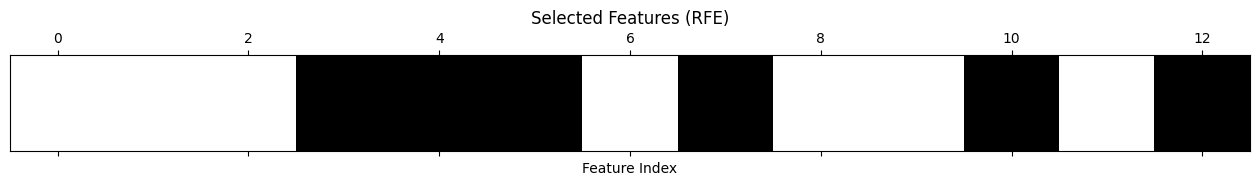

Number of features left: 6

Performance Before Feature Selection:
	Mean Squared Error (MSE): 34.4140
	R¬≤ Score: 0.6709

Performance After Feature Selection:
	Mean Squared Error (MSE): 30.9323
	R¬≤ Score: 0.7042

Train R¬≤: 0.7079, Test R¬≤: 0.7042
‚Üí Model is Balanced


In [14]:
from sklearn.feature_selection import RFE
# Initialize RFE with Linear Regression to select 6 features
select = RFE(model, n_features_to_select=6)

# Fit RFE on training data
select.fit(X_train, y_train)

# Plot the mask of selected features
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks(())
plt.title("Selected Features (RFE)")
plt.show()

# Transform train and test sets to selected features
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

# Print how many features are left
print("Number of features left:", X_train_selected.shape[1])

# Train a new model on selected features
lr = LinearRegression()  # ‚úÖ Use max_iter instead of max_iteration
lr.fit(X_train_selected, y_train)

# Predict on train and test sets
y_train_pred = lr.predict(X_train_selected)
y_test_pred = lr.predict(X_test_selected)

# Evaluate performance
print("\nPerformance Before Feature Selection:")
performance_metric(y_test, model.predict(X_test))  # Original model

print("\nPerformance After Feature Selection:")
metrics = performance_metric(y_test, y_test_pred)  # Now y_test_pred is defined

# Check for underfitting or overfitting
train_score = r2_score(y_train, y_train_pred)
test_score = metrics['r2']

print(f"\nTrain R¬≤: {train_score:.4f}, Test R¬≤: {test_score:.4f}")

if train_score > 0.9 and test_score < train_score * 0.9:
    print("‚Üí Possible Overfitting")
elif train_score < 0.6 and test_score < 0.6:
    print("‚Üí Underfitting")
else:
    print("‚Üí Model is Balanced")

In [46]:
# score =LinearRegression().fit(X_train_selected, y_train).score(X_test_selected, y_test)
# print("Test score: {:.3f}".format(score))

Test score: 0.704


In [15]:
features.columns[select.get_support()]

Index(['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat'], dtype='object')

In [16]:
fit_and_evaluate_model(LinearRegression(),X_train_selected , X_test_selected, y_train, y_test)

Training Set Performance:
	Mean Squared Error (MSE): 22.4810
	R¬≤ Score: 0.7079

Testing Set Performance:
	Mean Squared Error (MSE): 30.9323
	R¬≤ Score: 0.7042

Full Dataset Prediction Performance (using test predictions):
‚ö†Ô∏è Warning: Cannot compare y_test_pred with full y unless shapes match.


(array([20.90994652, 12.69913684, 14.71105828, 22.74439172, 22.25540459,
        17.35109121, 29.21555375, 14.67952771, 14.6006803 , 20.55925043,
        27.22299666, 29.55714015, 23.5537786 , 16.65527171, 15.99656653,
        18.72901537, 17.78466592, 20.15137322, 33.34266081, 31.28069789,
        20.84498051, 13.65696346, 16.13660736, 28.68029447, 14.54657843,
        25.19631291, 24.48595185, 32.89517209, 29.54510197,  8.68688983,
        34.68019711, 26.27560169, 15.31356312, 26.53721134, 27.94601056,
        34.14983626,  5.05218609, 14.41410883, 28.35209689, 11.84838747,
        16.10127998, 21.06407838,  8.54840675, 11.91294309, 35.18466334,
        24.62385153, 23.20265428, 23.88240828, 18.99075428, 20.7217498 ,
        36.42763672, 20.84286861, 10.28325556, 19.66468462, 25.2120758 ,
         7.69046058, 14.69364496, 26.36685785, 10.90364196, 14.0318265 ,
        16.53224119, 17.46678739, 32.48322725, 24.18084923, 25.73250257,
         7.39136821, 24.80034835,  4.27648105, 28.1

-More Complex Model: Pipline
train your model with LinearRegression using the following pipline:



###feature selection
###MinMaxScaler
###PolynomialFeatures with degree=2
###LinearRegression

In [17]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

# Build the pipeline
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    MinMaxScaler(),
    LinearRegression()
)

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_test_pred = pipeline.predict(X_test)

# Evaluate performance
fit_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Optional: Plot prediction curve ‚Äî only if using ONE feature
if X_train.shape[1] == 1:
    X_plot = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    y_plot = pipeline.predict(X_plot)

    plt.scatter(X_train, y_train, color='black', label='Training Data')
    plt.plot(X_plot, y_plot, color='blue', label='Polynomial Fit (Degree=2)')
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Polynomial Regression with Pipeline")
    plt.legend()
    plt.show()
else:
    print("‚ö†Ô∏è Skipping plot: Can't plot multi-feature regression directly.")

Training Set Performance:
	Mean Squared Error (MSE): 5.2393
	R¬≤ Score: 0.9319

Testing Set Performance:
	Mean Squared Error (MSE): 13.0729
	R¬≤ Score: 0.8750

Full Dataset Prediction Performance (using test predictions):
‚ö†Ô∏è Warning: Cannot compare y_test_pred with full y unless shapes match.
‚ö†Ô∏è Skipping plot: Can't plot multi-feature regression directly.


In [18]:
full_pipeline = make_pipeline(
    RFE(LinearRegression(), n_features_to_select=6),
    PolynomialFeatures(degree=2),
    MinMaxScaler(),
    LinearRegression()
)

full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=6)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [19]:
full_pipeline.fit(X_train, y_train)
y_test_pred = full_pipeline.predict(X_test)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create full pipeline with RFE
pipeline = make_pipeline(
    RFE(LinearRegression(), n_features_to_select=6),  # Select top 6 features
    PolynomialFeatures(degree=2, include_bias=False),
    MinMaxScaler(),
    LinearRegression()
)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_test_pred = pipeline.predict(X_test)

# Evaluate performance manually using fit_and_evaluate_model
fit_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Calculate and print R¬≤ score directly
test_r2 = pipeline.score(X_test, y_test)
train_r2 = pipeline.score(X_train, y_train)

print("\nModel R¬≤ Scores:")
print(f"Train R¬≤: {train_r2:.4f}")
print(f"Test  R¬≤: {test_r2:.4f}")

Training Set Performance:
	Mean Squared Error (MSE): 11.2323
	R¬≤ Score: 0.8541

Testing Set Performance:
	Mean Squared Error (MSE): 14.9874
	R¬≤ Score: 0.8567

Full Dataset Prediction Performance (using test predictions):
‚ö†Ô∏è Warning: Cannot compare y_test_pred with full y unless shapes match.

Model R¬≤ Scores:
Train R¬≤: 0.8541
Test  R¬≤: 0.8567


ÿ•ÿ∞ÿß ŸÉÿßŸÜ
train_r2
ŸÖÿ±ÿ™ŸÅÿπŸãÿß (>0.9) Ÿà
test_r2
ŸÖŸÜÿÆŸÅÿ∂Ÿãÿß (< train_r2 √ó 0.8):
ŸäŸàÿ¨ÿØ
Overfitting
ÿ•ÿ∞ÿß ŸÉÿßŸÜ
train_r2 < 0.7
Ÿà
test_r2
ŸÇÿ±Ÿäÿ® ŸÖŸÜŸá
ŸäŸàÿ¨ÿØ
Underfitting

ÿ•ÿ∞ÿß ŸÉÿßŸÜ ŸÉŸÑÿßŸáŸÖÿß ŸÖÿ±ÿ™ŸÅÿπŸäŸÜ ‚ûú ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
ÿ¨ŸäÿØ ŸàŸÖŸèŸàÿßÿ≤ŸÜ


In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R¬≤ Scores:", cv_scores)
print("Average CV R¬≤ Score:", cv_scores.mean())

Cross-Validation R¬≤ Scores: [0.77498949 0.85987791 0.8046847  0.68862759 0.66900826]
Average CV R¬≤ Score: 0.7594375900529592


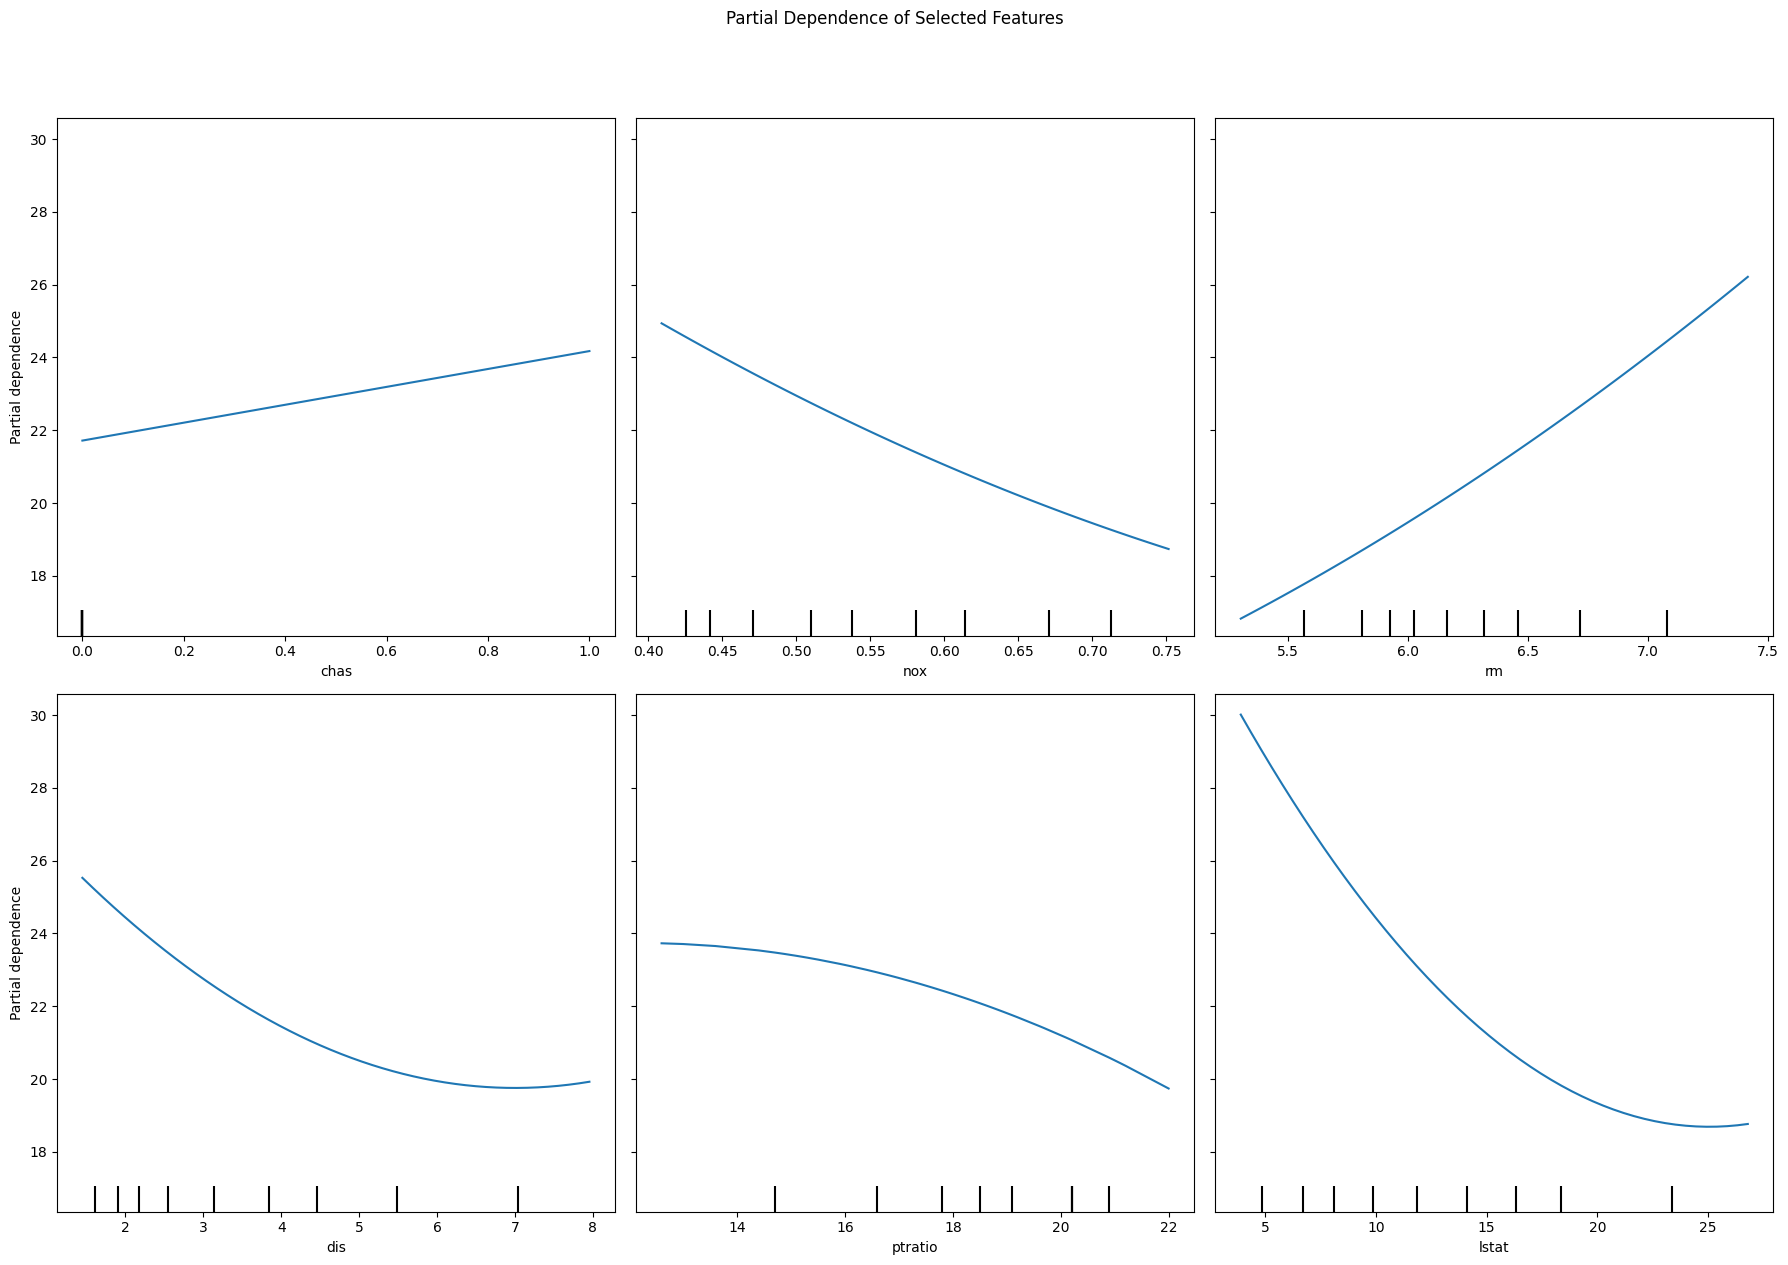

In [22]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Get feature names for better labeling (if available)
feature_names = data.drop('medv', axis=1).columns.tolist()

# Select top 6 features used by RFE
rfe = pipeline.named_steps['rfe']
selected_feature_mask = rfe.get_support()
selected_feature_names = [feature_names[i] for i, val in enumerate(selected_feature_mask) if val]

# Create a figure with custom size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjust rows/cols based on how many features you're plotting

# Plot partial dependence using the created axes
display = PartialDependenceDisplay.from_estimator(
    pipeline,
    X_train,
    features=selected_feature_names,  # You can also use indices like [0, 1, 2,...]
    feature_names=feature_names,
    n_jobs=-1,
    grid_resolution=50,
    ax=axes  # Pass the pre-created axes here
)

plt.suptitle("Partial Dependence of Selected Features", y=1.05)  # Add some space at the top
plt.tight_layout()
plt.show()

Analyzing Model Performance
In this section of the exercise, you'll take a look at several models' learning and testing performances on training data.

Learning Curves
The following pricture shows four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Answer the following question.

Question: Learning the Data
For each of the above situations answer the following questions:

is it High Bias, High Variance or Ideal
is it usefull to add more data?

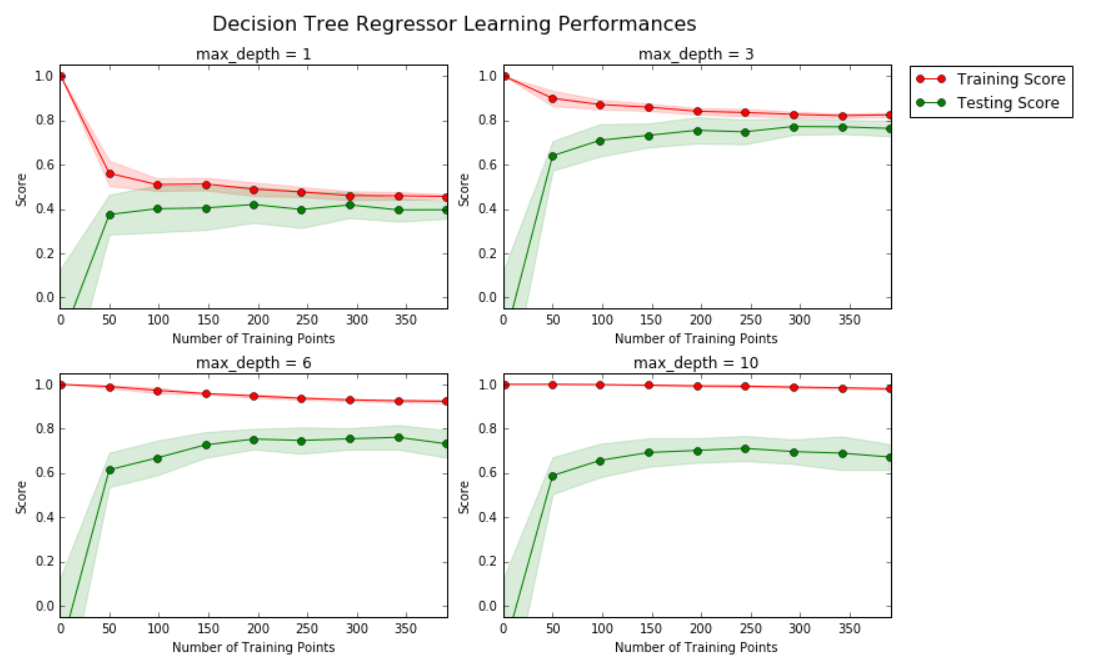


ÿ™ÿ≠ŸÑŸäŸÑ ŸÉŸÑ ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸàÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ÿπŸÑŸâ ÿßŸÑÿ£ÿ≥ÿ¶ŸÑÿ©:

ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ£ŸàŸÑ: Max Depth = 1

ÿ™ÿ≠ŸÑŸäŸÑ: ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖÿå ŸÜŸÑÿßÿ≠ÿ∏ ÿ£ŸÜ ŸÖŸÜÿ≠ŸÜŸâ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸàŸÖŸÜÿ≠ŸÜŸâ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± ŸÉŸÑÿßŸáŸÖÿß ÿπŸÜÿØ ŸÖÿ≥ÿ™ŸàŸâ ÿ£ÿØÿßÿ° ŸÖŸÜÿÆŸÅÿ∂ ÿ¨ÿØÿßŸã ŸàŸÇÿ±Ÿäÿ®ÿßŸÜ ÿ¨ÿØÿßŸã ŸÖŸÜ ÿ®ÿπÿ∂ŸáŸÖÿß ÿßŸÑÿ®ÿπÿ∂. Ÿáÿ∞ÿß Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ÿ≥Ÿäÿ∑ ŸÑŸÑÿ∫ÿßŸäÿ© Ÿàÿ∫Ÿäÿ± ŸÇÿßÿØÿ± ÿπŸÑŸâ ÿ™ÿπŸÑŸÖ ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ŸÅŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ®ÿ¥ŸÉŸÑ ŸÅÿπÿßŸÑÿå ÿ≠ÿ™Ÿâ ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿ≠ÿ¨ŸÖ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®.
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
is it High Bias, High Variance or Ideal: High Bias (ÿ™ÿ≠Ÿäÿ≤ ÿπÿßŸÑŸä / Underfitting)
is it usefull to add more data?: No (ŸÑÿß) - ŸÑÿ£ŸÜ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ÿ™ŸÉŸÖŸÜ ŸÅŸä ÿ®ÿ≥ÿßÿ∑ÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸàŸÑŸäÿ≥ ŸÅŸä ŸÜŸÇÿµ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.
ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ´ÿßŸÜŸä: Max Depth = 3

ÿ™ÿ≠ŸÑŸäŸÑ: ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖÿå ŸÜÿ±Ÿâ ÿ£ŸÜ ÿ£ÿØÿßÿ° ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ£ÿπŸÑŸâ ŸÖŸÜ ÿ£ÿØÿßÿ° ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± ŸàŸáŸÜÿßŸÉ ŸÅÿ¨Ÿàÿ©ÿå ŸÑŸÉŸÜ ÿßŸÑŸÅÿ¨Ÿàÿ© ŸÑŸäÿ≥ÿ™ ŸÉÿ®Ÿäÿ±ÿ© ÿ¨ÿØÿßŸã. ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿ≠ÿ¨ŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ÿå Ÿäÿ™ÿ¨Ÿá ÿßŸÑŸÖŸÜÿ≠ŸÜŸäÿßŸÜ ŸÑŸÑÿ™ŸÇÿßÿ±ÿ® ÿπŸÜÿØ ŸÖÿ≥ÿ™ŸàŸâ ÿ£ÿØÿßÿ° ÿ¨ŸäÿØ ŸÜÿ≥ÿ®ŸäÿßŸã ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ≠ÿßŸÑÿ© ÿßŸÑÿ≥ÿßÿ®ŸÇÿ©. Ÿáÿ∞ÿß Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿäÿ™ÿπŸÑŸÖ ÿßŸÑÿ£ŸÜŸÖÿßÿ∑ ÿßŸÑÿπÿßŸÖÿ© ÿ®ÿ¥ŸÉŸÑ ÿ¨ŸäÿØ ŸÖÿπ Ÿàÿ¨ŸàÿØ ÿØÿ±ÿ¨ÿ© ŸÖÿπŸÇŸàŸÑÿ© ŸÖŸÜ ÿßŸÑÿ™ÿπŸÖŸäŸÖ.
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
is it High Bias, High Variance or Ideal: Ideal (ŸÖÿ´ÿßŸÑŸä / ÿ™Ÿàÿßÿ≤ŸÜ ÿ¨ŸäÿØ)
is it usefull to add more data?: Might be slightly useful (ŸÇÿØ ŸäŸÉŸàŸÜ ŸÖŸÅŸäÿØÿßŸã ÿ®ÿ¥ŸÉŸÑ ÿ∑ŸÅŸäŸÅ) - ŸÑÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿäÿ™ÿπŸÑŸÖ ÿ®ÿ¥ŸÉŸÑ ÿ¨ŸäÿØ ÿ®ÿßŸÑŸÅÿπŸÑÿå ŸàŸÇÿØ ŸÑÿß ÿ™ÿ§ÿØŸä ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ•ÿ∂ÿßŸÅŸäÿ© ÿ•ŸÑŸâ ÿ™ÿ≠ÿ≥ŸÜ ŸÉÿ®Ÿäÿ± ÿ¨ÿØÿßŸã ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÜŸÅÿ≥Ÿá.
ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ´ÿßŸÑÿ´: Max Depth = 6

ÿ™ÿ≠ŸÑŸäŸÑ: ŸáŸÜÿßÿå ÿ£ÿØÿßÿ° ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸÖÿ±ÿ™ŸÅÿπ ÿ¨ÿØÿßŸãÿå ŸàŸáŸÜÿßŸÉ ŸÅÿ¨Ÿàÿ© Ÿàÿßÿ∂ÿ≠ÿ© ŸàŸÖŸÑŸÖŸàÿ≥ÿ© ÿ®ŸäŸÜŸá Ÿàÿ®ŸäŸÜ ÿ£ÿØÿßÿ° ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±ÿå ÿÆÿßÿµÿ© ÿπŸÜÿØ ÿ£ÿ≠ÿ¨ÿßŸÖ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿßŸÑÿµÿ∫Ÿäÿ±ÿ© ŸàÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑ÿ©. ŸÖÿπ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ÿå ÿ™ŸÇŸÑ ÿßŸÑŸÅÿ¨Ÿàÿ© ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ°ÿå ŸÑŸÉŸÜŸáÿß ŸÑÿß ÿ™ÿ≤ÿßŸÑ ŸÖŸàÿ¨ŸàÿØÿ©. Ÿáÿ∞ÿß ŸäÿØŸÑ ÿπŸÑŸâ ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿäÿ®ÿØÿ£ ŸÅŸä ÿ™ÿπŸÑŸÖ ÿ®ÿπÿ∂ ÿßŸÑÿ∂Ÿàÿ∂ÿßÿ° ŸÖŸÜ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®.
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
is it High Bias, High Variance or Ideal: High Variance (ÿ™ÿ¥ÿ™ÿ™ ÿπÿßŸÑŸä / Overfitting)
is it usefull to add more data?: Yes (ŸÜÿπŸÖ) - ÿ•ÿ∂ÿßŸÅÿ© ÿßŸÑŸÖÿ≤ŸäÿØ ŸÖŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸäŸÖŸÉŸÜ ÿ£ŸÜ Ÿäÿ≥ÿßÿπÿØ ŸÅŸä ÿ™ŸÇŸÑŸäŸÑ Overfitting Ÿàÿ™ÿ≠ÿ≥ŸäŸÜ ŸÇÿØÿ±ÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿπŸÑŸâ ÿßŸÑÿ™ÿπŸÖŸäŸÖ.
ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑÿ®ŸäÿßŸÜŸä ÿßŸÑÿ±ÿßÿ®ÿπ: Max Depth = 10

ÿ™ÿ≠ŸÑŸäŸÑ: ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑÿ±ÿ≥ŸÖÿå ÿ£ÿØÿßÿ° ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸÖÿ±ÿ™ŸÅÿπ ÿ¨ÿØÿßŸã ŸàŸÇÿ±Ÿäÿ® ÿ¨ÿØÿßŸã ŸÖŸÜ ÿßŸÑŸÇŸäŸÖÿ© ÿßŸÑŸÇÿµŸàŸâ (R¬≤=1)ÿå ÿ®ŸäŸÜŸÖÿß ÿ£ÿØÿßÿ° ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ± ŸÖŸÜÿÆŸÅÿ∂ ÿ®ÿ¥ŸÉŸÑ ŸÖŸÑÿ≠Ÿàÿ∏ ŸàŸáŸÜÿßŸÉ ŸÅÿ¨Ÿàÿ© ŸÉÿ®Ÿäÿ±ÿ© ÿ¨ÿØÿßŸã ŸàŸàÿßÿ∂ÿ≠ÿ© ÿ®ŸäŸÜ ÿßŸÑŸÖŸÜÿ≠ŸÜŸäŸäŸÜ ÿπŸÑŸâ ŸÉÿßŸÖŸÑ ŸÜÿ∑ÿßŸÇ ÿ£ÿ≠ÿ¨ÿßŸÖ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®. Ÿáÿ∞ÿß Ÿäÿ¥Ÿäÿ± ÿ•ŸÑŸâ ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿπŸÇÿØ ÿ¨ÿØÿßŸã ŸàŸäÿ™ÿπŸÑŸÖ ÿßŸÑÿ∂Ÿàÿ∂ÿßÿ° ŸÖŸÜ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ®ÿ¥ŸÉŸÑ ŸÖŸÅÿ±ÿ∑ÿå ŸÖŸÖÿß Ÿäÿ§ÿØŸä ÿ•ŸÑŸâ ÿ∂ÿπŸÅ ÿ£ÿØÿßÿ°Ÿá ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±.
ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©:
is it High Bias, High Variance or Ideal: High Variance (ÿ™ÿ¥ÿ™ÿ™ ÿπÿßŸÑŸä / Significant Overfitting)
is it usefull to add more data?: Yes (ŸÜÿπŸÖ) - ÿ•ÿ∂ÿßŸÅÿ© ÿßŸÑŸÖÿ≤ŸäÿØ ŸÖŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸáŸà ÿ£ÿ≠ÿØ ÿßŸÑÿ∑ÿ±ŸÇ ÿßŸÑŸÅÿπÿßŸÑÿ© ŸÑÿ™ŸÇŸÑŸäŸÑ Overfitting ŸÅŸä Ÿáÿ∞Ÿá ÿßŸÑÿ≠ÿßŸÑÿ©.

Model Selection and Evaluation
In this final section of the exercise, you will construct a multible model and make a prediction on the client's feature set using different learning models.

Grid Search on Decsion Tree Model
Train a the same pipline but using the decision tree model. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize:

'max_depth' parameter for the DecisionTreeRegressor, values range form 1 to 11 .
'n_features_to_select' parameter for the RFE, values range form 4 to 9 .
'degree' parameter for the PolynomialFeatures, values range form 1 to 11 .
what are the best params?
what the best score (mse)?

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# Create the pipeline
pipeline = make_pipeline(
    PolynomialFeatures(include_bias=False),
    MinMaxScaler(),
    RFE(DecisionTreeRegressor(random_state=42)),
    DecisionTreeRegressor(random_state=42)
)

# Define parameter grid
param_grid = {
    'polynomialfeatures__degree': range(1, 11),               # degree from 1 to 10
    'rfe__n_features_to_select': range(4, 9),                  # n_features_to_select from 4 to 8
    'decisiontreeregressor__max_depth': range(1, 11)           # max_depth from 1 to 10
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score (negative):", grid_search.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


Ensemble Model: AdaBoostRegressor
fit and evaluate a the same pipline but using the AdaBoostRegressor. with n_estimators set to 100 (( RFE'sn_features_to_select is 6 ) PolynomialFeatures's degree is 2)

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline

# Base estimator for AdaBoost (Decision Tree)
base_tree = DecisionTreeRegressor(max_depth=2, random_state=42)

# Create pipeline with RFE, Polynomial Features, Scaling and AdaBoost Regressor
pipeline_adaboost = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    MinMaxScaler(),
    RFE(base_tree, n_features_to_select=6),  # Select top 6 features
    AdaBoostRegressor(estimator=base_tree, n_estimators=100, random_state=42)
)

# Fit the model on training data
pipeline_adaboost.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = pipeline_adaboost.predict(X_train)
y_test_pred = pipeline_adaboost.predict(X_test)

# Evaluate performance
fit_and_evaluate_model(pipeline_adaboost, X_train, X_test, y_train, y_test)

Training Set Performance:
	Mean Squared Error (MSE): 21.9155
	R¬≤ Score: 0.7152

Testing Set Performance:
	Mean Squared Error (MSE): 31.4647
	R¬≤ Score: 0.6991

Full Dataset Prediction Performance (using test predictions):
‚ö†Ô∏è Warning: Cannot compare y_test_pred with full y unless shapes match.


(array([20.94657534, 20.56865672, 16.92857143, 21.3890625 , 20.56865672,
        17.53870968, 31.83      , 28.35      , 14.02833333, 21.06489362,
        21.3890625 , 30.23346457, 21.3890625 , 14.02833333, 16.92857143,
        20.56865672, 14.08571429, 20.94657534, 39.80418251, 31.83451777,
        20.94657534, 14.02833333, 19.982     , 30.68975265, 14.02833333,
        21.06489362, 21.3890625 , 28.99411765, 28.84964029, 14.02833333,
        36.39634146, 37.63928571, 14.08571429, 30.23346457, 30.23346457,
        30.23346457, 14.02833333, 14.02833333, 28.99411765, 14.02833333,
        14.08571429, 20.56865672, 14.02833333, 14.02833333, 36.39634146,
        28.99411765, 25.45980392, 21.06489362, 17.91586207, 20.48198198,
        36.39634146, 21.06489362, 14.02833333, 21.06489362, 28.35      ,
        14.02833333, 14.02833333, 28.89444444, 14.02833333, 14.08571429,
        18.70238095, 17.53870968, 33.15587045, 21.3890625 , 30.68975265,
        14.02833333, 28.35      , 14.02833333, 30.2

now let's choose the best degree for PolynomialFeatures by ploting the validation_curve using degree range up to 7. what is the optimal degree? is it your best model?

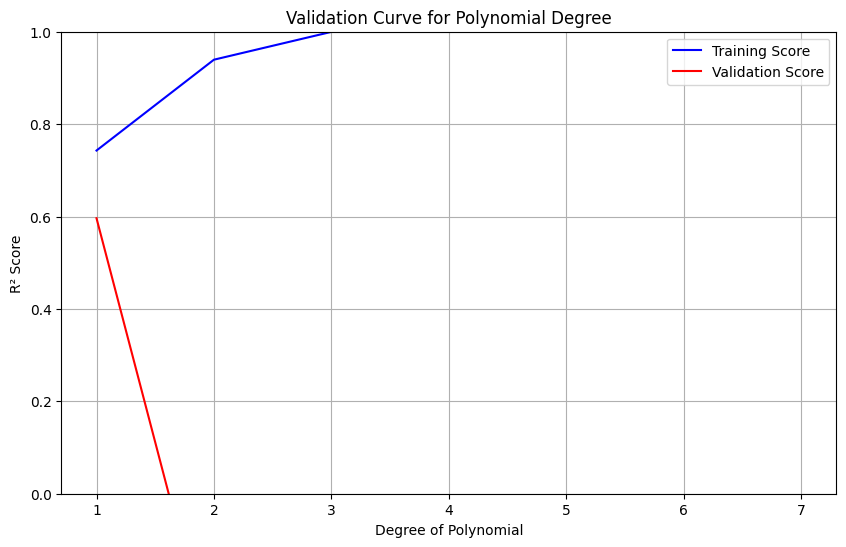

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Create a pipeline with PolynomialFeatures + Linear Regression
def PolynomialRegression(degree):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )

# Define degree range
degree = np.arange(1, 8)  # Up to 7 as requested

# Generate validation curve (using R¬≤ score by default)
train_scores, val_scores = validation_curve(
    estimator=PolynomialRegression(degree=1),  # Dummy model to get structure
    X=X,
    y=y,
    param_name="polynomialfeatures__degree",
    param_range=degree,
    scoring="r2",
    cv=7,
    n_jobs=-1
)

# Take median scores across cross-validation folds
train_scores_median = np.median(train_scores, axis=1)
val_scores_median = np.median(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degree, train_scores_median, color='blue', label='Training Score')
plt.plot(degree, val_scores_median, color='red', label='Validation Score')

plt.title("Validation Curve for Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R¬≤ Score")
plt.legend(loc='best')
plt.ylim(0, 1)
plt.grid(True)
plt.show()